In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter


In [6]:
participant_data = pd.read_csv("Demographics Information - Human Participants.csv")
print(participant_data.shape)
participant_data.head()

(175, 27)


,Study Name/Number,Publication (0) vs Physionet (1),Race,Present,Ethnicity,Present.1,Study sample size,Gender/Sex,Present.2,Male,...,Max Age (years),Country/Region,Location,Pre-existing conditions and/or Symptoms,Instruments used,Socioeconomic Status,Data Collected (differnent levels of),Date Study was Conducted/Published,Date Study Posted on PhysioNet,Field
0,Abdominal and Direct Fetal ECG Database: Multi...,NaN,X,0,X,0,5 women in labor were analyzed,Unknown (collected from fetal heartbeats of pr...,0,X,...,0.79,Poland,Department of Obstetrics at the Medical Univer...,Women in labor,"KOMPOREL System (ITAM Institute, Zabrze, Polan...",X,NaN,NaN,NaN,cardiac_electrophysiology
1,AF Termination Challenge Database: ECG recordi...,NaN,X,0,X,0,Three groups in Learning Set: 1. Group N (non...,X,0,X,...,X,USA,X,X,Not listed; two ECG signals used,X,NaN,NaN,NaN,cardiac_electrophysiology
2,AHA Database Sample Excluded Record: Two ECG s...,NaN,X,0,X,0,80 recordings (10 for each existing condition)...,X,0,X,...,X,USA,Washington University (St. Louis),"No ventricular ectopy, isolated unifocal PVCs,...",Not listed; two ECG signals used,X,NaN,NaN,NaN,cardoac_electrophysiology
3,A large scale 12-lead electrocardiogram databa...,NaN,X,0,X,0,"45, 152 patients",Male and Female,1,X,...,X,China,"Chapman University, Shaoxing People's Hospital...",Includes information about pre-existing condit...,GE MUSE ECG System,X,NaN,NaN,NaN,cardiac_electrophysiology
4,A multi-camera and multimodal dataset for post...,NaN,X,0,X,0,14,10 males; 4 females,1,10,...,30,Portugal,Portugal (University of Minho),No clinical history of any abnormalities,MVN BIOMECH,X,"walking straight in a corridor, turning right ...",NaN,NaN,gait/balance/motion


In [7]:
data = participant_data[['Present', 'Present.1', 'Present.2', 'Present.3']]
data = data.rename(columns={"Present": "Race", "Present.1": "Ethn.", "Present.3": "Age", "Present.2": "Gender"})
data.head()
sums = data.sum()
print(sums)


Race       10
Ethn.       6
Gender    131
Age       126
dtype: int64


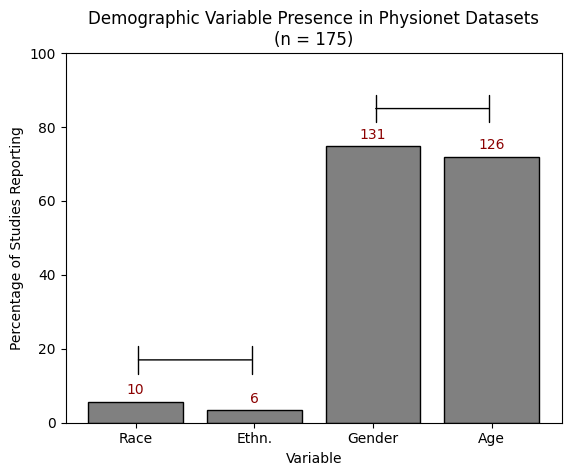

In [10]:
def addlabels(x,y,c):
    for i in range(len(x)):
        plt.text(i, y[i]+2, c[i], ha = 'center', color = 'darkred') # choose a color so the number above the bar is not confused witht he y axis labels

race = [5.71]
ethnicity = [3.43]
gender = [69.14]
age = [71.43]

simple = {'Race': sums[0]/1.75, 'Ethn.': sums[1]/1.75, 'Gender': sums[2]/1.75, 'Age': sums[3]/1.75}
vars = list(simple.keys())
values = list(simple.values())

fig, ax = plt.subplots()
plt.bar(vars, values, color = 'grey', edgecolor = 'black')
plt.title('Demographic Variable Presence in Physionet Datasets\n(n = 175)')
plt.ylabel("Percentage of Studies Reporting")
plt.xlabel("Variable")
plt.ylim(0, 100)

counts = [sums[0], sums[1], sums[2], sums[3]]
addlabels(vars, values, counts)

# plt.annotate('*', xy=(0, 25), ha='center', color='blue', fontsize=12, weight='bold')
# plt.annotate('*', xy=(1, 25), ha='center', color='blue', fontsize=12, weight='bold')
plt.annotate("", xy=(1, 17), xytext=(0, 17), arrowprops=dict(arrowstyle='|-|, widthB=1.0', lw=1.0, color = 'black'))

# plt.annotate('*', xy=(3, 90), ha='center', color='green', fontsize=12, weight='bold')
# plt.annotate('*', xy=(2, 90), ha='center', color='green', fontsize=12, weight='bold')
plt.annotate("", xy=(2, 85), xytext=(3, 85), arrowprops=dict(arrowstyle='|-|, widthB=1.0', lw=1.0, color = 'black'))

plt.show()


In [9]:
age_data = pd.read_csv("Demographics Information - Age.csv")
print(age_data.shape)
age_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Demographics Information - Age.csv'

In [ ]:
no_outlier = age_data.drop(age_data.index[123])
avg_age = age_data["Average Age"].dropna()
avg_age.head()
# print(avg_age.size)
print(avg_age.mean())

36.816057692307695


In [ ]:
cleaned = age_data
## .dropna(subset=['Ma Age', 'Total N'])
min_age = cleaned["Min Age"].dropna()
min_age.head()
# print(min_age.size)
print(min_age.mean())

24.441358024685186


In [ ]:
max_age = cleaned["Ma Age"].dropna()
max_age.head()
# print(max_age.size)
# print(max_age.mean())

6     63.0
7     34.0
12    71.0
13    90.0
14    65.0
Name: Ma Age, dtype: float64

In [ ]:
maxAvg = cleaned.max(axis=0)['Average Age']
minAvg = cleaned.min(axis=0)['Average Age']
avgBins = (maxAvg-minAvg)
print(maxAvg, minAvg, avgBins)
print(cleaned['Average Age'].mean())

78.36 6.1 72.26
36.816057692307695


/var/folders/fr/ll6js0lj7fn2yj36y64f4z4h0000gn/T/ipykernel_70442/1412212747.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxAvg = cleaned.max(axis=0)['Average Age']
/var/folders/fr/ll6js0lj7fn2yj36y64f4z4h0000gn/T/ipykernel_70442/1412212747.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minAvg = cleaned.min(axis=0)['Average Age']


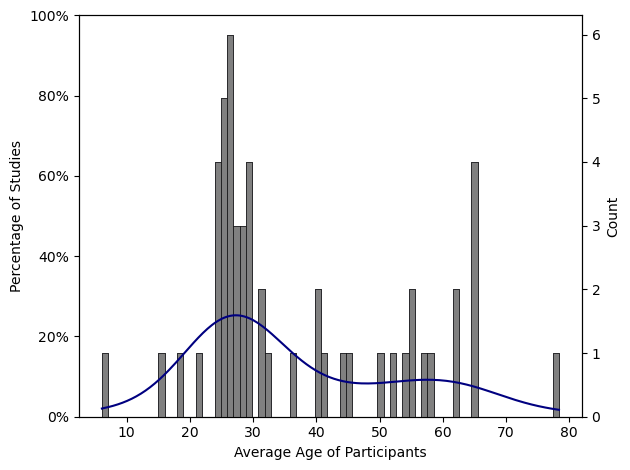

In [ ]:

fig, ax = plt.subplots()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Average Age of Participants")
plt.ylabel("Percentage of Studies")
ax2 = ax.twinx()
sns.histplot(avg_age, kde=True, ax=ax2, bins = 73, color = 'navy')
plt.hist(avg_age, color = 'grey', bins = 73, edgecolor = 'black', linewidth = .4)
plt.tight_layout()
plt.show()


In [ ]:
# print(cleaned[cleaned['Min Age'] == cleaned['Min Age'].max()])
# print(cleaned[cleaned['Min Age'] == cleaned['Min Age'].min()])

maxMin = cleaned.max(axis=0)['Min Age']
minMin = cleaned.min(axis=0)['Min Age']
minBins = (maxMin-minMin)
print(maxMin, minMin, minBins)

65.0 0.0 65.0


/var/folders/fr/ll6js0lj7fn2yj36y64f4z4h0000gn/T/ipykernel_70442/3469288051.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxMin = cleaned.max(axis=0)['Min Age']
/var/folders/fr/ll6js0lj7fn2yj36y64f4z4h0000gn/T/ipykernel_70442/3469288051.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minMin = cleaned.min(axis=0)['Min Age']


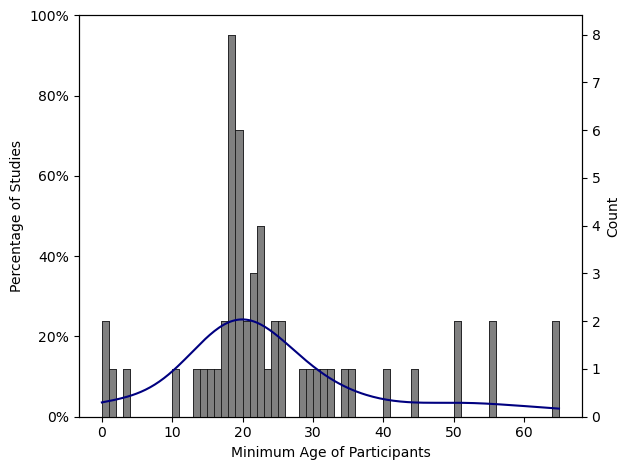

In [ ]:
fig, ax = plt.subplots()
plt.xlabel("Minimum Age of Participants")
plt.ylabel("Percentage of Studies")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax2 = ax.twinx()
sns.histplot(min_age, kde = True, ax=ax2, bins = 65, color = 'navy')
plt.hist(min_age, color = 'grey', bins = 65, edgecolor = 'black', linewidth = .4)
plt.tight_layout()
plt.show()

In [ ]:
# print(cleaned[cleaned['Ma Age'] == cleaned['Ma Age'].max()])
# print(cleaned[cleaned['Ma Age'] == cleaned['Ma Age'].min()])

maxMax = cleaned.max(axis=0)['Ma Age']
minMax = cleaned.min(axis=0)['Ma Age']
maxBins = (maxMax-minMax)
print(maxMax, minMax, maxBins)

95.0 13.58333333 81.41666667


/var/folders/fr/ll6js0lj7fn2yj36y64f4z4h0000gn/T/ipykernel_70442/1535142572.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxMax = cleaned.max(axis=0)['Ma Age']
/var/folders/fr/ll6js0lj7fn2yj36y64f4z4h0000gn/T/ipykernel_70442/1535142572.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minMax = cleaned.min(axis=0)['Ma Age']


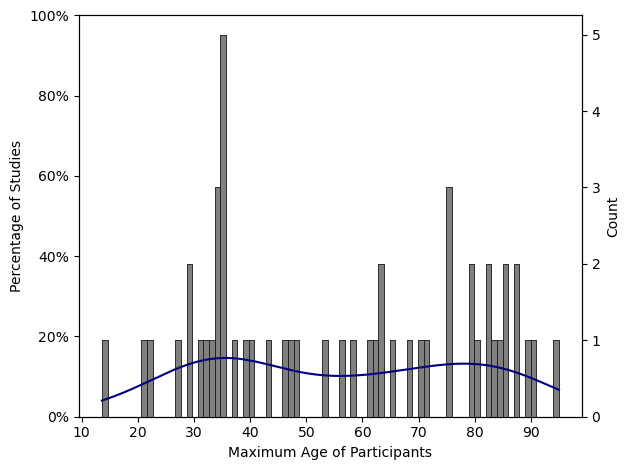

In [ ]:
fig, ax = plt.subplots()
plt.xlabel("Maximum Age of Participants")
plt.ylabel("Percentage of Studies")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax2 = ax.twinx()
sns.histplot(max_age, ax=ax2, kde = True, bins = 81, color = 'navy')
plt.hist(max_age, color = 'grey', bins = 81, edgecolor = 'black', linewidth = .4)

plt.tight_layout()
plt.show()